In [1]:
import numpy as np
import pandas as pd
import joblib
from tqdm.auto import tqdm
# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression # For Variance Inflation Factor

# Dataset splitting
from sklearn.model_selection import train_test_split

# Modeling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# Performance Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, classification_report


In [2]:
df_x = pd.read_csv('../datasets/winequality_white_x_train.csv')
df_y = pd.read_csv('../datasets/winequality_white_y_train.csv')

In [3]:
df = pd.concat([df_x, df_y], axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,3,4,5,6,7,8,9
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.083478,0.445455,0.244186,0.661290,0,0,0,0,1,0,0
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.113553,0.272727,0.383721,0.548387,0,0,1,0,0,0,0
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.117602,0.563636,0.279070,0.596774,0,0,0,1,0,0,0
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.089069,0.554545,0.232558,0.677419,0,0,0,0,1,0,0
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.134760,0.563636,0.581395,0.241935,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.136302,0.454545,0.313953,0.306452,0,0,0,1,0,0,0
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.163678,0.454545,0.244186,0.225806,0,0,0,1,0,0,0
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.080586,0.272727,0.360465,0.548387,0,0,0,1,0,0,0
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.165028,0.409091,0.186047,0.419355,0,0,0,1,0,0,0


<AxesSubplot: >

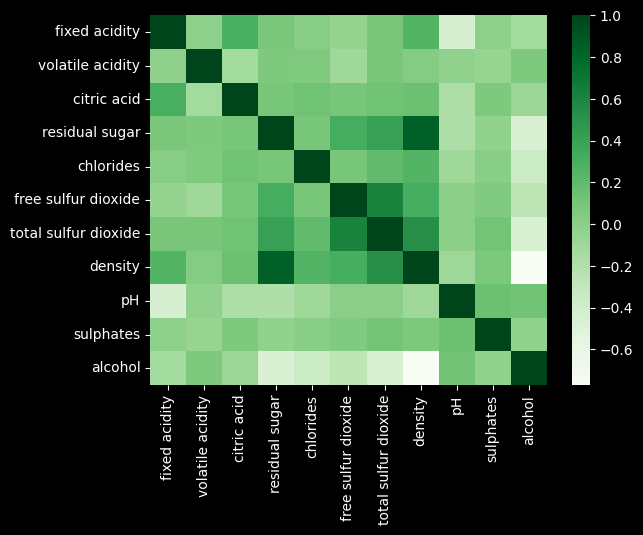

In [4]:
sns.heatmap(df_x.corr(), cmap="Greens")

<AxesSubplot: >

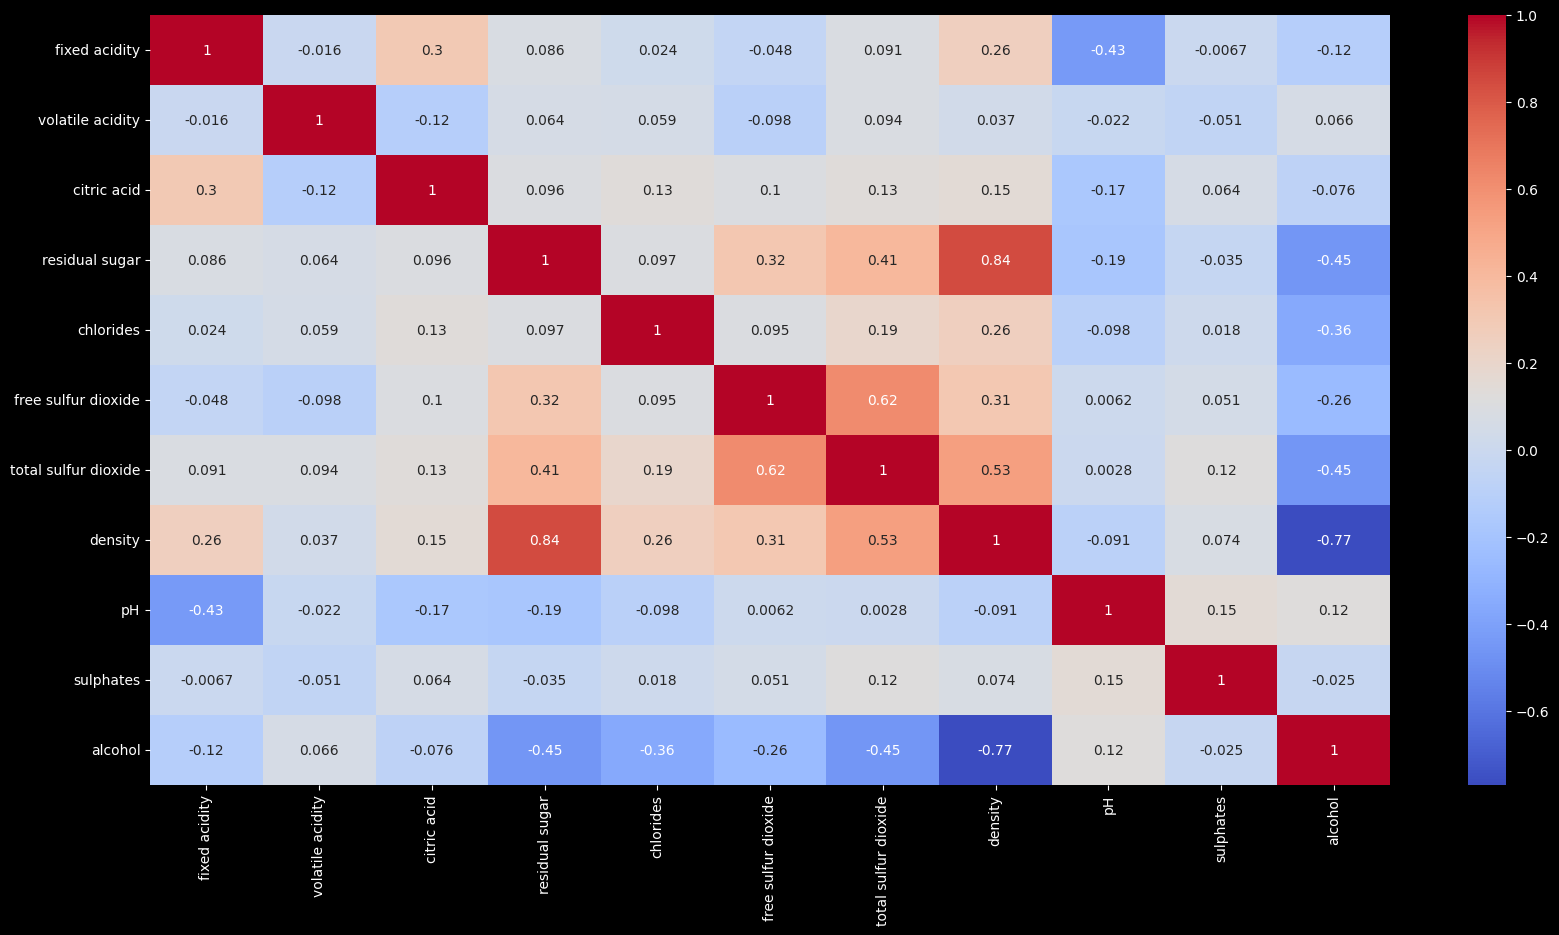

In [5]:
corr = df_x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [6]:
fig = px.scatter(df_x, x="fixed acidity", y="pH")
fig.show()

In [7]:
numerical  = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
        'sulphates', 'alcohol','density']

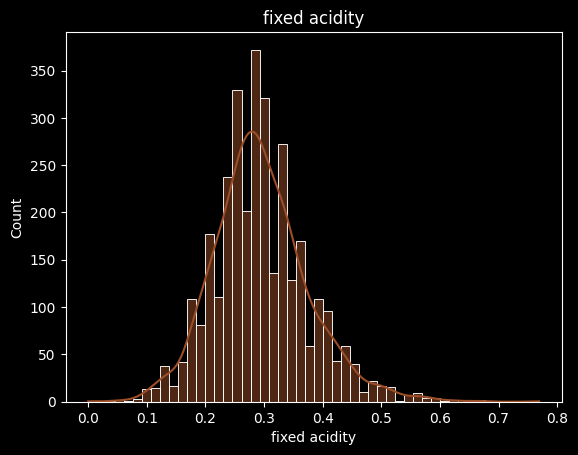

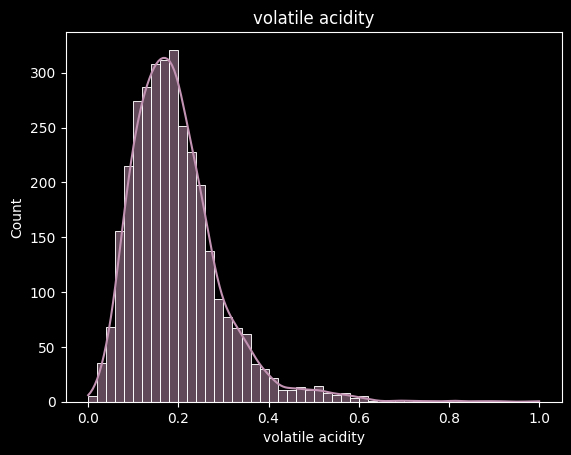

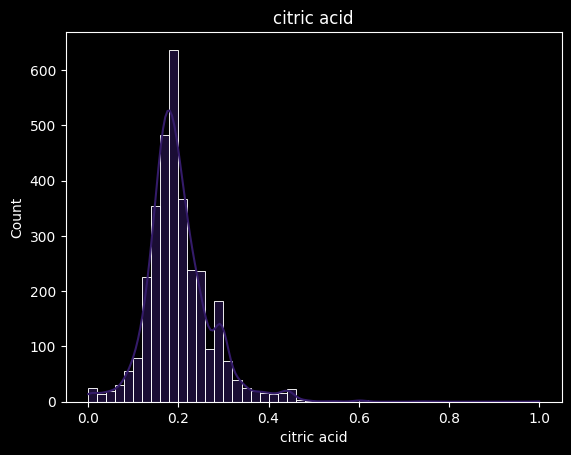

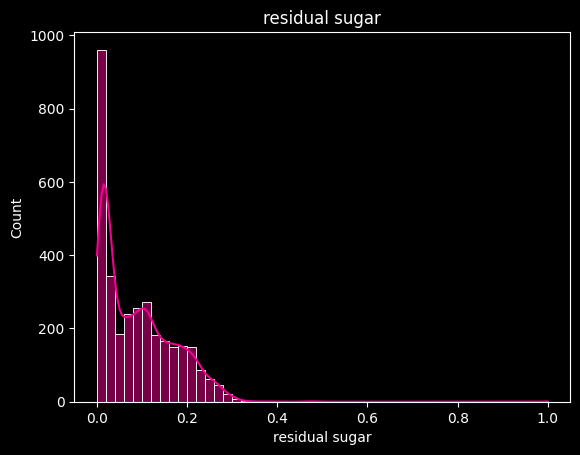

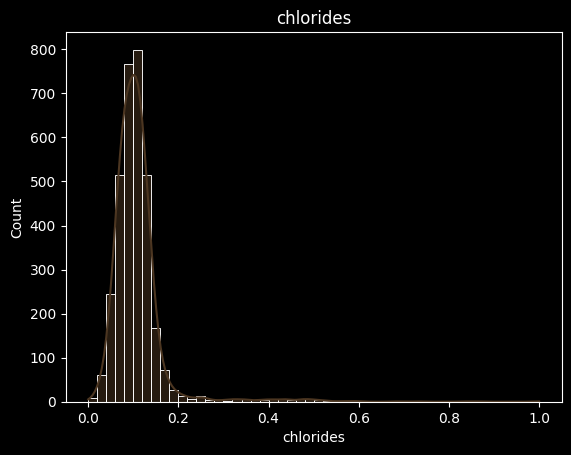

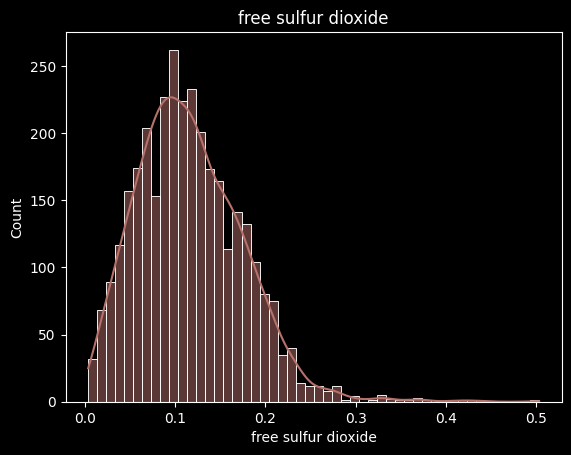

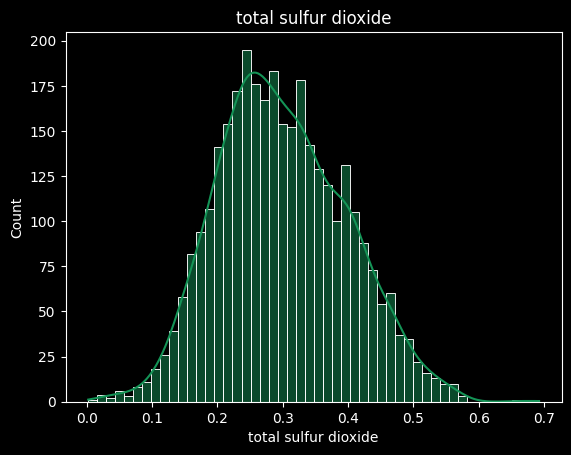

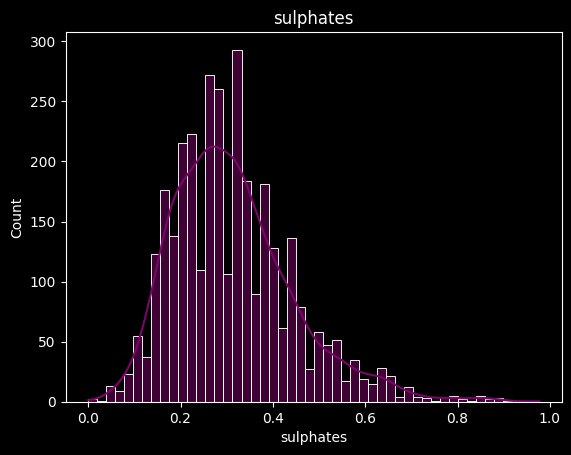

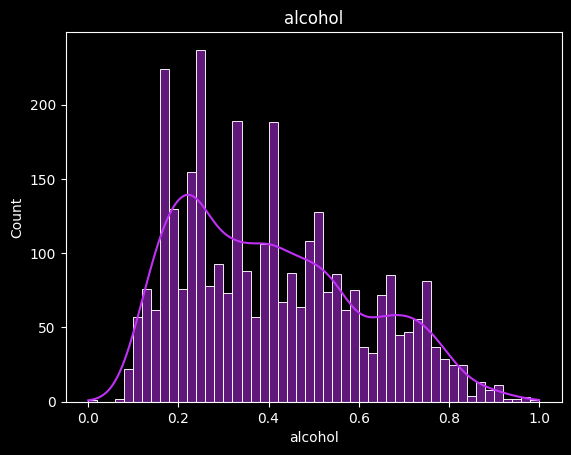

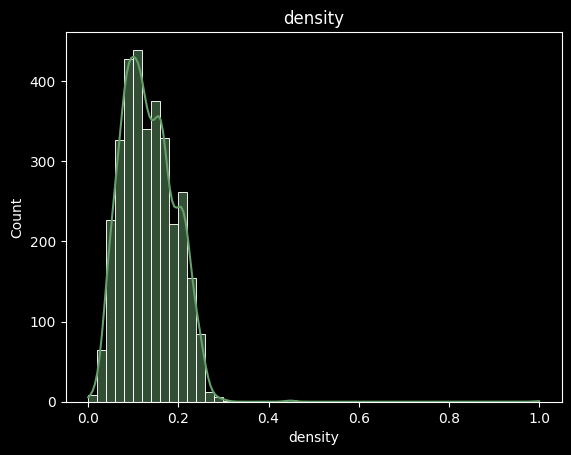

In [8]:
for feature in numerical:
    data=df_x.copy()
    sns.histplot(data=data[feature], bins=50, kde=True,color=np.random.rand(3,))
    #data[feature].hist(bins=30,color=np.random.rand(3,))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [9]:
df_x = df_x[numerical]

In [10]:
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.244186,0.661290,0.083478
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.383721,0.548387,0.113553
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.279070,0.596774,0.117602
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.232558,0.677419,0.089069
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.581395,0.241935,0.134760
...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.313953,0.306452,0.136302
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.244186,0.225806,0.163678
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.360465,0.548387,0.080586
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.186047,0.419355,0.165028


In [11]:
df_cleaned = pd.concat([df_x, df_y], axis=1)

In [12]:
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density,3,4,5,6,7,8,9
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.244186,0.661290,0.083478,0,0,0,0,1,0,0
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.383721,0.548387,0.113553,0,0,1,0,0,0,0
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.279070,0.596774,0.117602,0,0,0,1,0,0,0
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.232558,0.677419,0.089069,0,0,0,0,1,0,0
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.581395,0.241935,0.134760,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.313953,0.306452,0.136302,0,0,0,1,0,0,0
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.244186,0.225806,0.163678,0,0,0,1,0,0,0
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.360465,0.548387,0.080586,0,0,0,1,0,0,0
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.186047,0.419355,0.165028,0,0,0,1,0,0,0


In [13]:
df_full_train, df_test = train_test_split(df_cleaned, test_size=0.1, random_state=1)

In [14]:
len(df_full_train), len(df_test)

(2952, 329)

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size=0.1, random_state=1)

In [16]:
print(f'Length of Train dataset: {len(df_train)}')
print(f'Length of Validation dataset: {len(df_val)}')
print(f'Length of Test dataset: {len(df_test)}')

Length of Train dataset: 2656
Length of Validation dataset: 296
Length of Test dataset: 329


In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_full_train = df_full_train.iloc[:,-7:].values
y_train = df_train.iloc[:,-7:].values
y_val = df_val.iloc[:,-7:].values
y_test = df_test.iloc[:,-7:].values

In [19]:
y_full_train.shape

(2952, 7)

In [20]:
X_full_train = df_full_train[numerical].values
X_train = df_train[numerical].values
X_val = df_val[numerical].values
X_test = df_test[numerical].values

### Baseline Model with RandomForestClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
print(f1_score(y_val, y_pred_val, average="macro"))

0.3316737397940405


c:\Machine Learning Training\contest\ml-mini-project\env\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



In [23]:
rf_full = RandomForestClassifier(random_state=0)
rf_full.fit(X_full_train, y_full_train)
y_pred_test = rf_full.predict(X_test)
print(f1_score(y_test, y_pred_test, average="macro"))

0.3649844576603436


c:\Machine Learning Training\contest\ml-mini-project\env\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.



In [24]:
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.244186,0.661290,0.083478
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.383721,0.548387,0.113553
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.279070,0.596774,0.117602
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.232558,0.677419,0.089069
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.581395,0.241935,0.134760
...,...,...,...,...,...,...,...,...,...,...
3276,0.230769,0.127451,0.313253,0.090491,0.112760,0.090592,0.264501,0.313953,0.306452,0.136302
3277,0.307692,0.058824,0.192771,0.128834,0.089021,0.181185,0.306265,0.244186,0.225806,0.163678
3278,0.365385,0.186275,0.313253,0.039877,0.100890,0.090592,0.331787,0.360465,0.548387,0.080586
3279,0.240385,0.156863,0.174699,0.200920,0.077151,0.177700,0.290023,0.186047,0.419355,0.165028


In [25]:
df_y

,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
3276,0,0,0,1,0,0,0
3277,0,0,0,1,0,0,0
3278,0,0,0,1,0,0,0
3279,0,0,0,1,0,0,0


In [26]:
df_y_orig =df_y.idxmax(1)
df_y_orig

0       7
1       5
2       6
3       7
4       6
       ..
3276    6
3277    6
3278    6
3279    6
3280    8
Length: 3281, dtype: object

### Oversampling using SMOTE

In [27]:
oversample = SMOTE(k_neighbors=4)
# transform the dataset
df_x_smote, df_y_smote = oversample.fit_resample(df_x, df_y_orig)

In [28]:
df_y_smote.value_counts()

7    1467
5    1467
6    1467
8    1467
4    1467
3    1467
9    1467
dtype: int64

In [29]:
df_cleaned_smote = pd.concat([df_x_smote, df_y_smote], axis=1)
df_cleaned_smote

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density,0
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.244186,0.661290,0.083478,7
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.383721,0.548387,0.113553,5
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.279070,0.596774,0.117602,6
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.232558,0.677419,0.089069,7
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.581395,0.241935,0.134760,6
...,...,...,...,...,...,...,...,...,...,...,...
10264,0.368101,0.238219,0.214342,0.072112,0.052695,0.082387,0.213552,0.381750,0.577000,0.107250,9
10265,0.313814,0.194282,0.278764,0.030113,0.060702,0.117504,0.243828,0.219883,0.784462,0.059749,9
10266,0.299823,0.212126,0.251363,0.021193,0.056378,0.092175,0.217672,0.312907,0.760993,0.056942,9
10267,0.458882,0.183688,0.277441,0.119386,0.074803,0.093350,0.260088,0.266799,0.493473,0.156592,9


In [30]:
df_y_smote_ohe = pd.get_dummies(df_cleaned_smote.iloc[:,-1], prefix='rating')

In [31]:
df_cleaned_smote_ohe = pd.concat([df_x_smote, df_y_smote_ohe], axis=1)
df_cleaned_smote_ohe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,density,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8,rating_9
0,0.173077,0.196078,0.240964,0.084356,0.074184,0.118467,0.252900,0.244186,0.661290,0.083478,0,0,0,0,1,0,0
1,0.432692,0.323529,0.307229,0.021472,0.109792,0.031359,0.459397,0.383721,0.548387,0.113553,0,0,1,0,0,0,0
2,0.144231,0.225490,0.228916,0.151840,0.065282,0.177700,0.303944,0.279070,0.596774,0.117602,0,0,0,1,0,0,0
3,0.307692,0.274510,0.180723,0.067485,0.091988,0.132404,0.310905,0.232558,0.677419,0.089069,0,0,0,0,1,0,0
4,0.259615,0.098039,0.156627,0.012270,0.094955,0.132404,0.306265,0.581395,0.241935,0.134760,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,0.368101,0.238219,0.214342,0.072112,0.052695,0.082387,0.213552,0.381750,0.577000,0.107250,0,0,0,0,0,0,1
10265,0.313814,0.194282,0.278764,0.030113,0.060702,0.117504,0.243828,0.219883,0.784462,0.059749,0,0,0,0,0,0,1
10266,0.299823,0.212126,0.251363,0.021193,0.056378,0.092175,0.217672,0.312907,0.760993,0.056942,0,0,0,0,0,0,1
10267,0.458882,0.183688,0.277441,0.119386,0.074803,0.093350,0.260088,0.266799,0.493473,0.156592,0,0,0,0,0,0,1


In [32]:
df_full_train_smote, df_test_smote = train_test_split(df_cleaned_smote_ohe, test_size=0.1, random_state=1)

In [33]:
df_train_smote, df_val_smote = train_test_split(df_full_train_smote, test_size=0.1, random_state=1)

In [34]:
df_train_smote = df_train_smote.reset_index(drop=True)
df_val_smote = df_val_smote.reset_index(drop=True)
df_test_smote = df_test_smote.reset_index(drop=True)

In [35]:
y_full_train_smote = df_full_train_smote.iloc[:,-7:].values
y_train_smote = df_train_smote.iloc[:,-7:].values
y_val_smote = df_val_smote.iloc[:,-7:].values
y_test_smote = df_test_smote.iloc[:,-7:].values

In [36]:
X_full_train_smote = df_full_train_smote[numerical].values
X_train_smote = df_train_smote[numerical].values
X_val_smote = df_val_smote[numerical].values
X_test_smote = df_test_smote[numerical].values

In [37]:
rf_smote = RandomForestClassifier(random_state=0)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_val_smote = rf.predict(X_val_smote)
print(f1_score(y_val_smote, y_pred_val_smote, average="macro"))

0.5274810745013027


In [38]:
rf_full_smote = RandomForestClassifier(random_state=0)
rf_full_smote.fit(X_full_train_smote, y_full_train_smote)
y_pred_test_smote = rf_full.predict(X_test_smote)
print(f1_score(y_test_smote, y_pred_test_smote, average="macro"))

0.5477748781534925


In [39]:
from joblib import dump, load

# https://scikit-learn.org/stable/model_persistence.html
model_file = "../models/rf_white_wine_model.joblib"

dump(rf_full_smote, model_file)

['../models/rf_white_wine_model.joblib']

### Thank you